In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
#교차검증을 위한 라이브러리 
from sklearn.model_selection import cross_val_score

# 1.문제정의
- 버섯의 특징을 활용해 독 / 식용 버섯 분류
- Decision tree 시각화 & 과대적합 제어
- 특성 중요도 확인(여러가지 영역을 나누고 제일 잘 나누어진 영역을 고른다)

# 2.데이터 수집

In [36]:
mush=pd.read_csv("mushroom.csv")
mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 3. 데이터 전처리
- info: 결측치, 데이터 타입
- describe():이상치 확인
- 이상치를 확인할땐 데이터가 수치형 데이터여야함

In [37]:
# 결측치 파악
mush.info() #object타입 ->string타입이라고 생각해도된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [38]:
# 이상치 파악
#count : 데이터 개수
# unique: 중복을 제거한 데이터 개수
# top: 가장많은 비율을 차지하는 데이터
# freq: top의 실제 데이터
mush.describe() #문자형 데이터기 때문에 제한된 정보들이 나온다.

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
X=mush.loc[:,'cap-shape':] #문제

In [40]:
y=mush.loc[:,'poisonous']#정답

In [41]:
# y=mush.iloc[:,0]# Series
# X=mush.iloc[:,1:]
y=mush.iloc[:,:1]#Dataframe출력 범위지정이라서 데이터프레임

In [42]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124, 1)


In [43]:
# 원핫인코딩 
#  get_dummies
X_onehot=pd.get_dummies(X)

In [44]:
X_onehot.shape

(8124, 117)

In [45]:
#문제데이터는 수치형
#정답데이터는 문자열로 있어도 상관없다.
#train,test분리
X_train,X_test,y_train,y_test = train_test_split(X_onehot,#문제데이터
                                                 y,#정답데이터
                                                 random_state=3,#섞는 방법
                                                 test_size=0.3#정답 비율
                                                )

In [46]:
# label encoding
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [47]:
habitat_dic ={
    'u':1 , #u를 1로 바꾸겠다.
    'g':2 ,
    'm':3 ,
    'd':4 ,
    'p':5 ,
    'w':6 ,
    'l':7
}
a=X['habitat'].map(habitat_dic).value_counts()

In [48]:
a

4    3148
2    2148
5    1144
7     832
1     368
3     292
6     192
Name: habitat, dtype: int64

# 4. EDA(탐색적 데이터분석)

<BarContainer object of 7 artists>

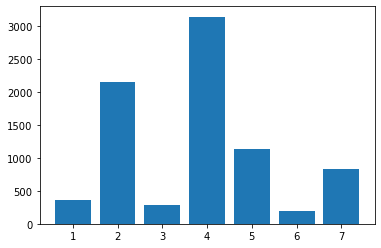

In [49]:
plt.bar(a.index,a)

<BarContainer object of 7 artists>

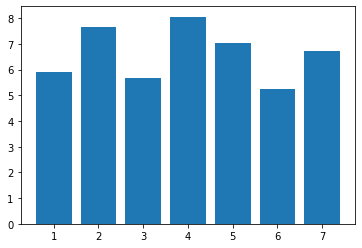

In [50]:
plt.bar(a.index,np.log(a)) #값의 편차들을 줄여준다 -편차줄이는 이유 중요도를 고루 분포시키기위해서

# 5. 모델 선택 및 하이퍼파라미터 튜닝

In [70]:
tree = DecisionTreeClassifier(max_depth = 2)  

In [72]:
#교차검증
#사용한모델,훈련용문제(X_train),훈련용 정답(y_train),몇겹 교차검증을 할건지
#cv = 5이기때문에 5개의 값이 나옴 = 5겹 교차검증
#5개의 값이 모두 다름 > 교차검증을 진행할때마다 train과 test데이터가 변함
#5개의 값을 평균내서 testscore를 예측해 볼 수 있음
#최적의 파라미터를 찾을 수 있음
cross_val_score(tree,X_train,y_train,cv=5)

array([0.95518453, 0.96130167, 0.9525066 , 0.93931398, 0.95778364])

In [78]:
tree1 = DecisionTreeClassifier(max_depth = 1)  
cross_val_score(tree1,X_train,y_train,cv=5).mean()

0.8863860280422227

In [77]:
tree2 = DecisionTreeClassifier(max_depth = 2)  
cross_val_score(tree2,X_train,y_train,cv=5).mean()

0.9532180853941477

In [76]:
tree3 = DecisionTreeClassifier(max_depth = 3)  
cross_val_score(tree3,X_train,y_train,cv=5).mean()

0.9857546065942966

# 6.학습

In [52]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

# 7.평가

In [53]:
print('train score',tree.score(X_train,y_train))
print('train score',tree.score(X_test,y_test))

train score 1.0
train score 1.0


In [54]:
# tree모델의 특성 중요도 확인하기
fi = tree.feature_importances_
fi

array([0.00000000e+00, 1.40467380e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38784363e-03, 0.00000000e+00, 2.29503788e-02, 0.00000000e+00,
       0.00000000e+00, 2.30627489e-02, 0.00000000e+00, 6.16063447e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92150180e-05,
       5.28094909e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.75846481e-01, 0.00000000e+00, 8.97862256e-02,
      

In [55]:
# 모든 행 출력
pd.set_option('display.max_rows',None)
# 모든 열 출력
pd.set_option('display.max_columns',None)

In [56]:
# 보기좋게 만들기
# 특성 중요도는 0~1 사이의 숫자로 이루어짐
# 117개 컬럼의 특성 중요도의 총합은 1
importance_df = pd.DataFrame(fi,index = X_onehot.columns)
importance_df.sort_values(by=0,ascending=False)

,0
odor_n,0.616063
stalk-root_c,0.175846
stalk-root_r,0.089786
spore-print-color_r,0.032861
stalk-surface-below-ring_y,0.031337
odor_l,0.023063
odor_a,0.022950
gill-size_n,0.005281
cap-shape_c,0.001405
bruises_f,0.001388


In [ ]:
#교차검증
#최적의 하이퍼파라미터를 찾는것 
#5와6을 번갈아가면서 진행해야한다.

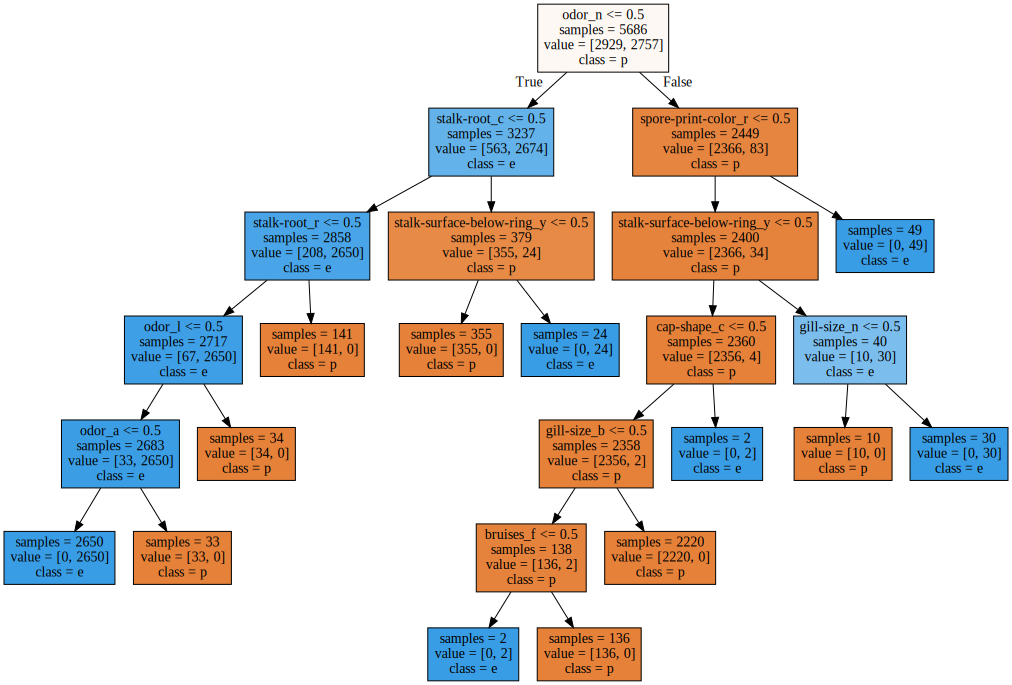

In [57]:
#시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False,
               filled=True)

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
!pip install graphviz

import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [58]:
#알고리즘 사진저장 실행코드0이나오면 저장이 됐다는 것
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [59]:
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

# 5.1모델 선택 및 하이퍼파라미터 튜닝

# 6.1

# 7.1

In [60]:
tree2 = DecisionTreeClassifier(max_depth=3)
tree2.fit(X_train,y_train)
print(f'train score: {tree2.score(X_train,y_train)}')
print('train score : {}'.format(tree2.score(X_test,y_test)))

train score: 0.9857544846992613
train score : 0.9840032813781788


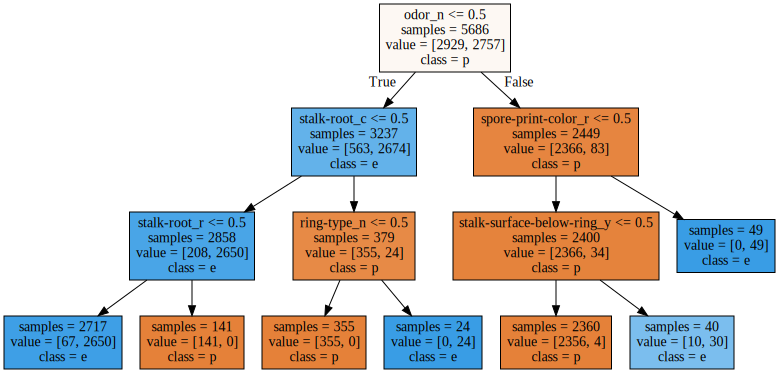

In [61]:
export_graphviz(tree2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns, #이름을 달아주는 것
               impurity=False, 
               filled=True)
#gini = 0부터 1까지 이루어짐
#0.5에 가까워질수록 안좋고 0과 1에 가까워질 수록 좋다.(한 쪽에 데이터가 몰려있다. 잘 나뉘어졌다.)
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [62]:
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

0